In [133]:
# All required imports

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

In [134]:
# Read the provided dataset

leads = pd.read_csv("Leads.csv");
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [135]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [136]:
leads.shape

(9240, 37)

In [137]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [138]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Data Preparation

In [139]:
# Data Cleaning - Identify missing and null values in all columns

leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [140]:
# In the above step, we identified the missing columns and now we can drop all the columns 
# which contain missing values greater than 3000 fields

for lead in leads.columns:
    if leads[lead].isnull().sum() > 3000:
        leads.drop(lead, 1, inplace=True)

In [141]:
# verify columns again

leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [142]:
# As part of cleanup, drop city and country columns

leads.drop(['City'], axis = 1, inplace = True)
leads.drop(['Country'], axis = 1, inplace = True)

# Check null / missing agin

leads.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
How did you hear about X Education               2207
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
X Education Forums                                  0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
Prospect ID                 

# Identifying columns with invalid selections / Select values

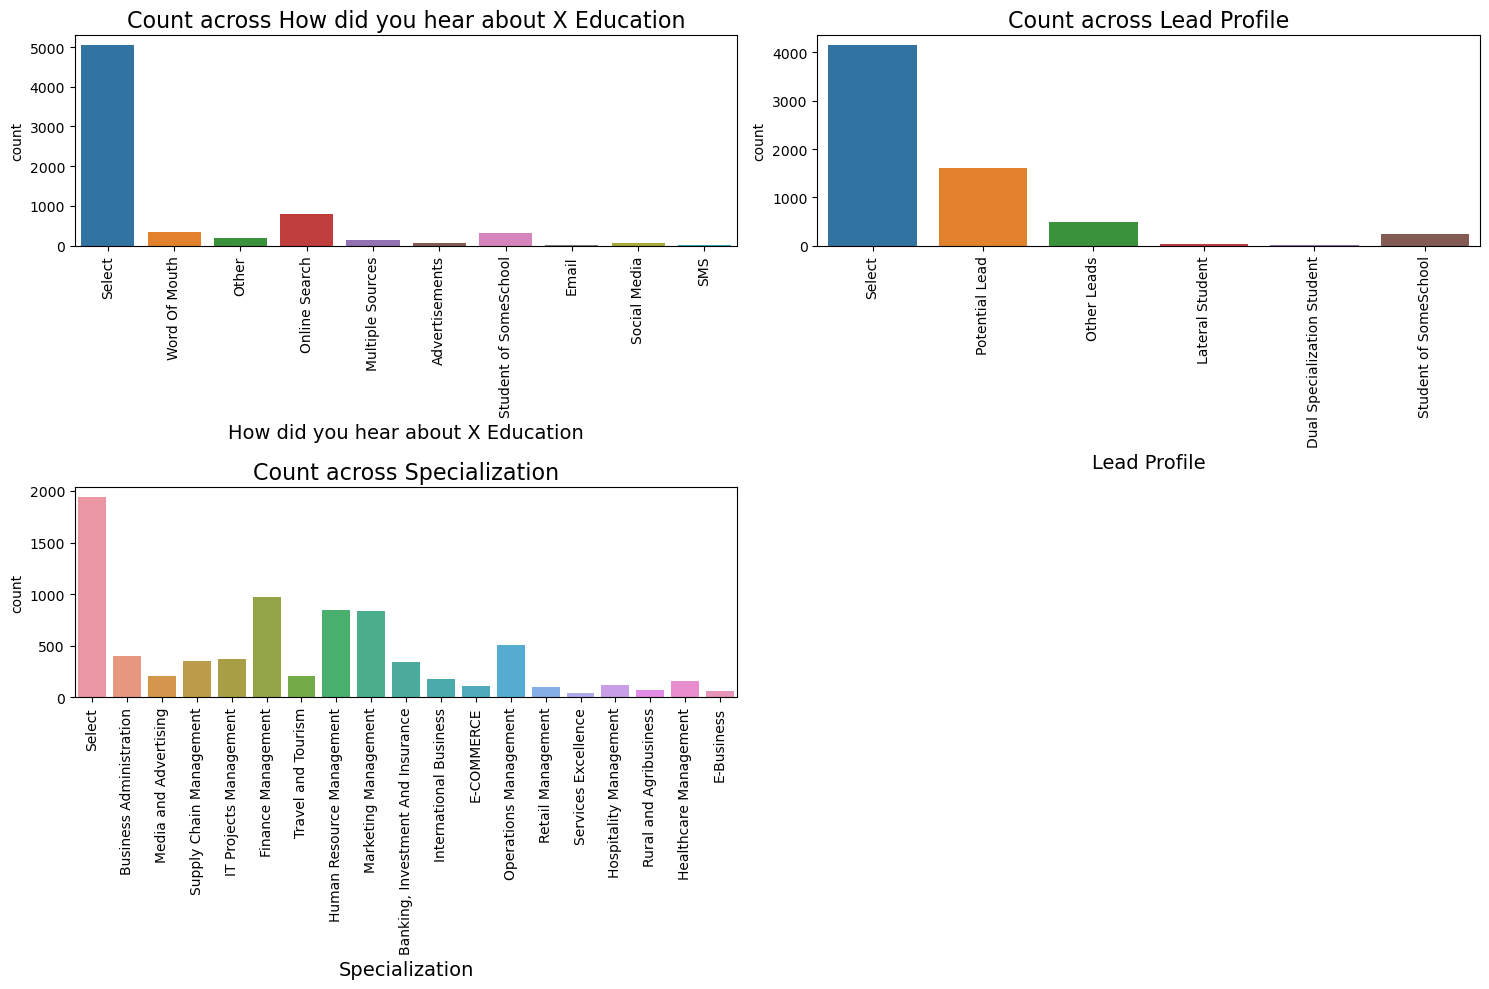

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_count(df, column, fig_num):
    plt.subplot(2, 2, fig_num)
    sns.countplot(df[column])
    plt.title('Count across ' + column, size=16)
    plt.xlabel(column, size=14)
    plt.xticks(rotation=90)

plt.figure(figsize=(15, 10))

plot_count(df=leads, column='How did you hear about X Education', fig_num=1)
plot_count(df=leads, column='Lead Profile', fig_num=2)
plot_count(df=leads, column='Specialization', fig_num=3)

plt.tight_layout()

In [144]:
# Print value counts of all columns

for c in leads:
    print(leads[c].astype('category').value_counts())
    print('---------------------------------------------------------------------------')


000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
---------------------------------------------------------------------------
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
---------------------------------------------------------------------------
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Na

In [145]:
# From above its evident that these columns have Select values : Lead Profile, Specialization and How did you head about X Education.
# These are useless and can be dropped.

leads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

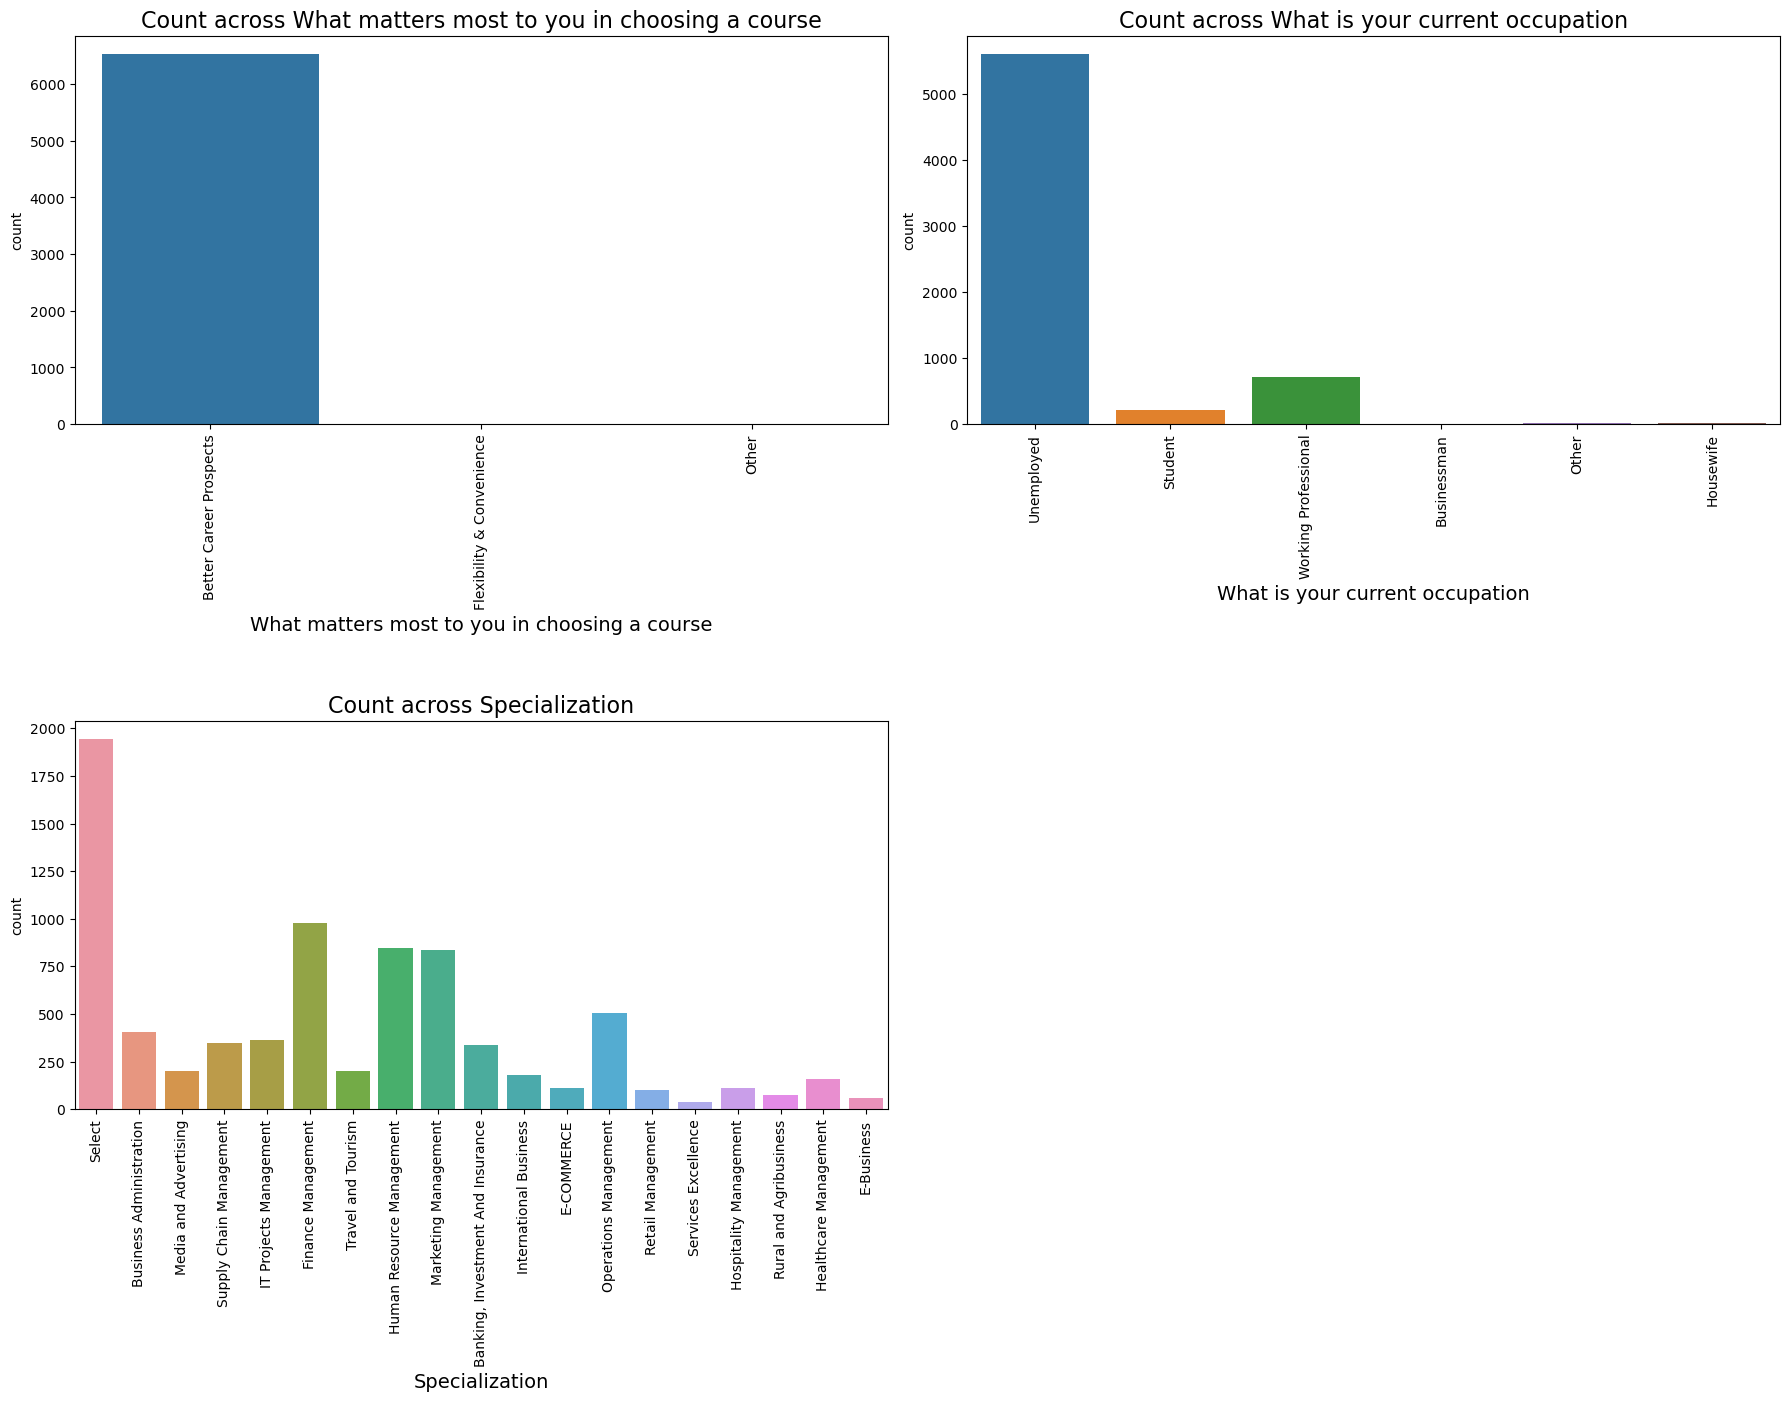

In [146]:
# Feature visualization

def plot_countplot(data, x_col, fig_num):
    plt.subplot(4, 2, fig_num)
    sns.countplot(data[x_col])
    plt.title('Count across ' + x_col, size=16)
    plt.xlabel(x_col, size=14)
    plt.xticks(rotation=90)


plt.figure(figsize=(18, 25))

plot_countplot(leads, 'What matters most to you in choosing a course', 1)
plot_countplot(leads, 'What is your current occupation', 2)
plot_countplot(leads, 'Specialization', 3)

plt.tight_layout()

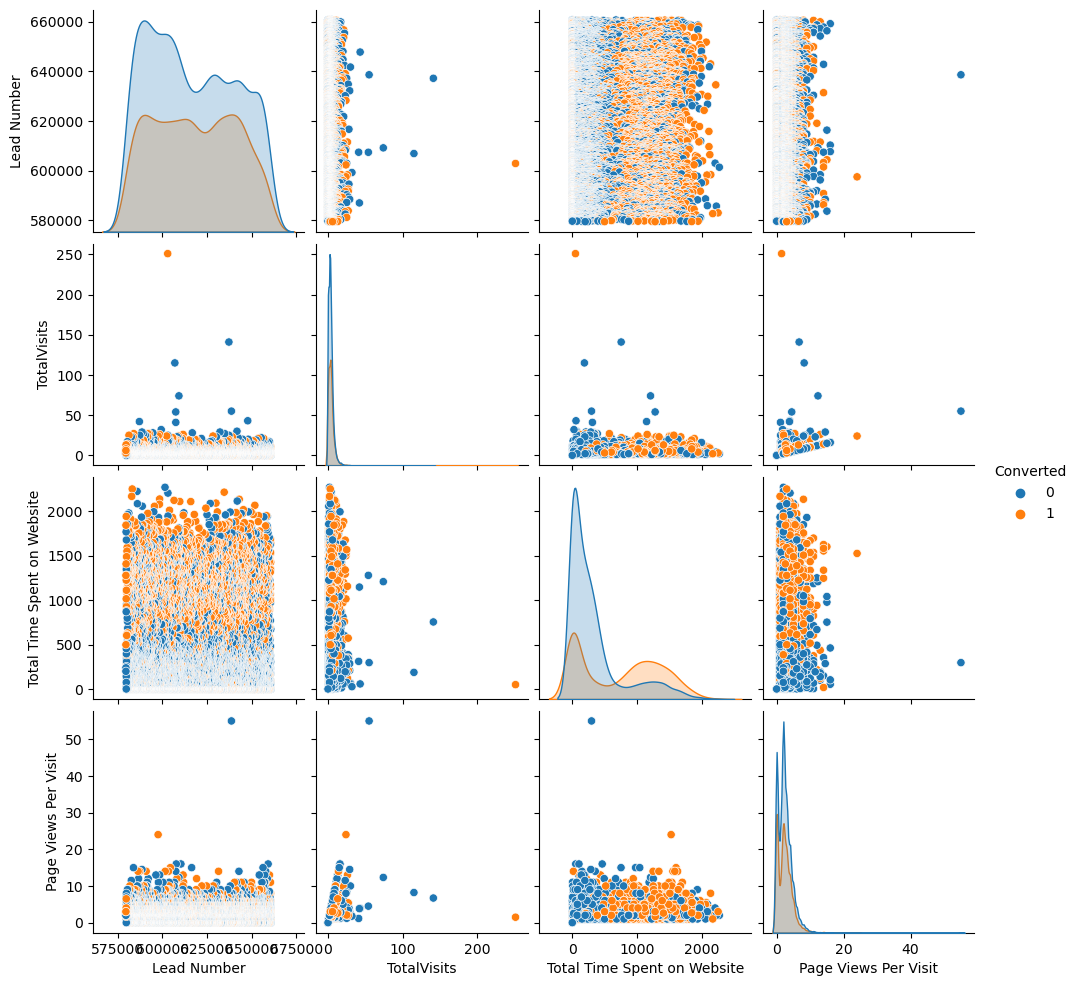

In [147]:
def pairplot(data, hue_col='Converted'):
  """
  Plots a pairwise plot of the data, with the hue specified by the hue_col parameter.

  Args:
    data: The data to plot.
    hue_col: The column to use for the hue.
  """

  sns.pairplot(data, diag_kind='kde', hue=hue_col)
  plt.show()


if __name__ == '__main__':

  # Plot the pairwise plot
  pairplot(leads)

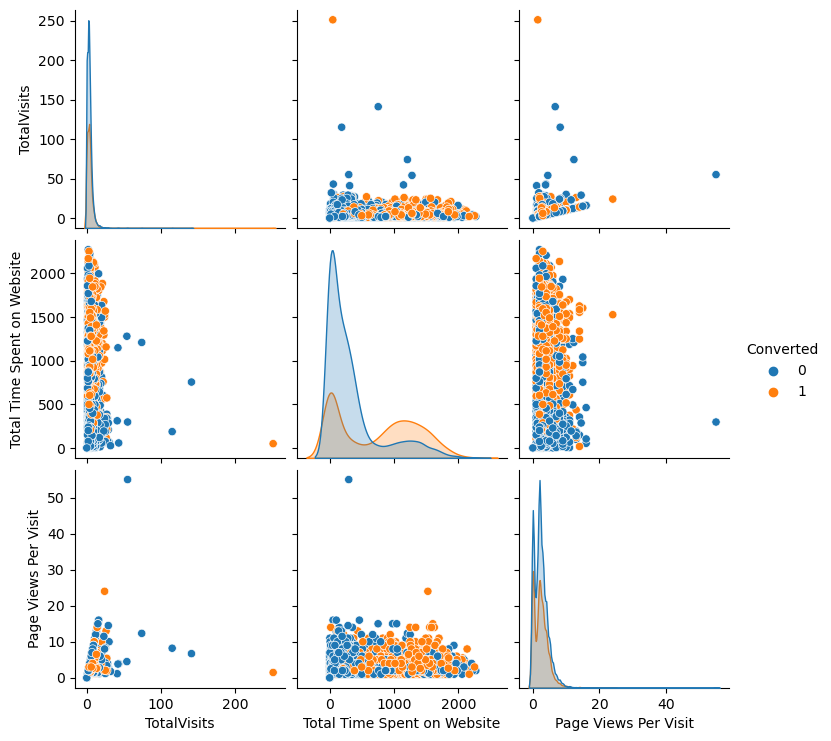

In [148]:
# Create a new variable for the data
data = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]

# Create the pairplot
sns.pairplot(data, diag_kind='kde', hue='Converted')
plt.show()

In [149]:
# Dropping unwanted null values of columns

leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)
leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)
leads = leads[~pd.isnull(leads['What is your current occupation'])]

In [150]:
# Check nulls again

leads.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

# Dummy variable creation

In [151]:
# Identify all columns which are of type Object

temp = leads.loc[:, leads.dtypes == 'object']
temp.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [152]:
# Create a copy of the original dataframe
df = leads.copy()

# Create dummy variables for the specified columns
dummy_cols = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
               'What is your current occupation', 'A free copy of Mastering The Interview',
               'Last Notable Activity']
for col in dummy_cols:
  df_dummies = pd.get_dummies(df[col], drop_first=True)
  df = pd.concat([df, df_dummies], axis=1)

# Drop the original columns
df = df.drop(dummy_cols, axis=1)

# Create a dummy variable for the 'Specialization' column, but drop the 'Select' level
df_spl_dummies = pd.get_dummies(df['Specialization'], prefix='Specialization')
df_spl_dummies = df_spl_dummies.drop('Specialization_Select', axis=1)
df = pd.concat([df, df_spl_dummies], axis=1)

# Assign df to leads
leads = df

# Print the head of the dataframe
leads.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Landing Page Submission,Lead Add Form,Lead Import,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,Select,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,Select,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,Business Administration,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,Media and Advertising,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,Select,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Test Train Split step

In [153]:
# Import the required library

from sklearn.model_selection import train_test_split

# Insert all the feature variables
xyz = leads.drop(['Converted', 'Prospect ID', 'Specialization', 'Lead Number'], 1)
xyz.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,Direct Traffic,Facebook,Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [154]:
# Insert target variables

abc = leads['Converted']
abc.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [155]:
# Splitting into 70% train and 30% test

xyz_train, xyz_test, abc_train, abc_test = train_test_split(xyz, abc, train_size=0.7, test_size=0.3, random_state=100)
# Now both datasets have the same number of samples
print(xyz_train.shape)
print(abc_train.shape)

(4585, 75)
(4585,)


# Scaling step

In [156]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

def scale_features(xyz_train):
  """
  Scales the three numeric features present in the dataset.

  Args:
    xyz_train: The training dataset.

  Returns:
    The scaled training dataset.
  """

  # Get the three numeric features.
  numeric_features = ['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

  # Create a MinMaxScaler object.
  scaler = MinMaxScaler()

  # Fit the scaler to the numeric features.
  scaler.fit(xyz_train[numeric_features])

  # Transform the numeric features.
  xyz_train[numeric_features] = scaler.transform(xyz_train[numeric_features])

  return xyz_train


xyz_train = scale_features(xyz_train)

xyz_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,Direct Traffic,Facebook,Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8766,0.095652,0.261444,0.066727,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
148,0.043478,0.102113,0.045455,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8146,0.121739,0.801937,0.127273,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2782,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6309,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


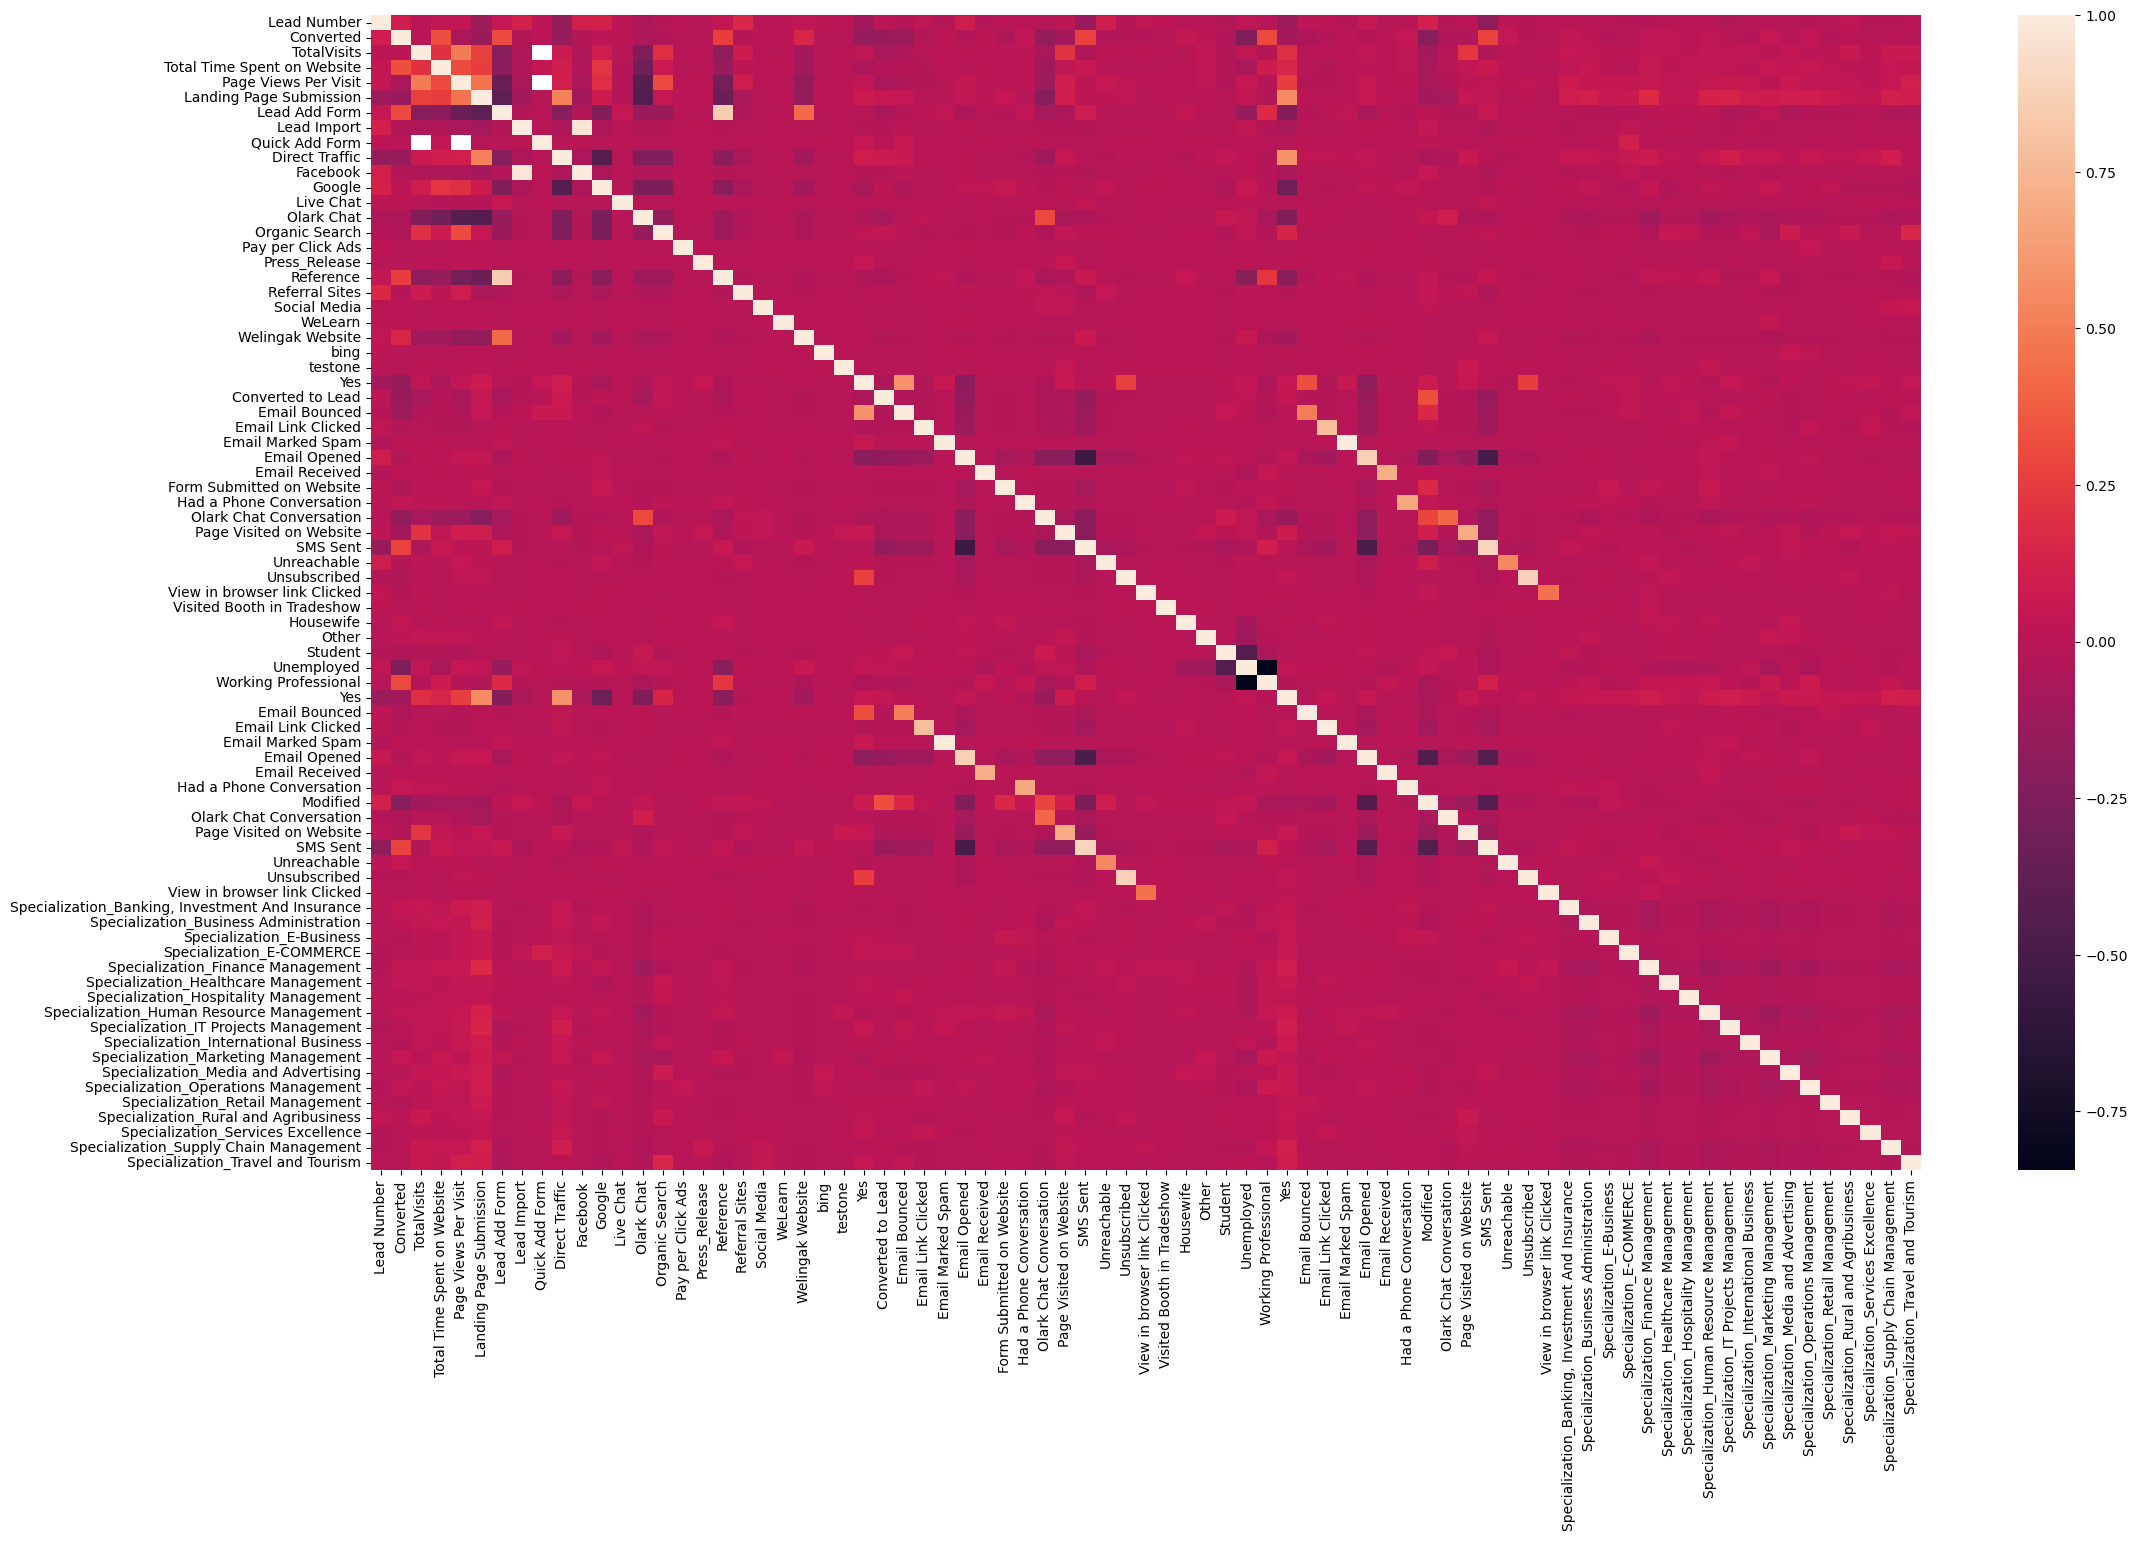

In [157]:
# Correlations

plt.figure(figsize = (25,15))
sns.heatmap(leads.corr())
plt.show()

# Model Building step

In [158]:
# Check sklearn version

import sklearn
print(sklearn.__version__)

1.0.2


In [159]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [160]:
from sklearn.feature_selection import RFE

xyz_train = xyz_train.fillna(0)
abc_train = abc_train.fillna(0)

rfe = RFE(estimator=logreg, n_features_to_select=15)  # Running RFE with 15 variables as output
rfe = rfe.fit(xyz_train, abc_train)

In [161]:
# Let's take a look at which features have been selected by RFE

list(zip(xyz_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Landing Page Submission', False, 17),
 ('Lead Add Form', True, 1),
 ('Lead Import', False, 47),
 ('Quick Add Form', False, 43),
 ('Direct Traffic', False, 4),
 ('Facebook', False, 42),
 ('Google', False, 24),
 ('Live Chat', False, 50),
 ('Olark Chat', True, 1),
 ('Organic Search', False, 22),
 ('Pay per Click Ads', False, 34),
 ('Press_Release', False, 57),
 ('Reference', False, 52),
 ('Referral Sites', False, 23),
 ('Social Media', False, 31),
 ('WeLearn', False, 41),
 ('Welingak Website', True, 1),
 ('bing', False, 32),
 ('testone', False, 60),
 ('Yes', True, 1),
 ('Converted to Lead', False, 3),
 ('Email Bounced', False, 6),
 ('Email Link Clicked', False, 44),
 ('Email Marked Spam', False, 40),
 ('Email Opened', False, 33),
 ('Email Received', False, 51),
 ('Form Submitted on Website', False, 39),
 ('Had a Phone Conversation', False, 53),
 ('Olark Chat Conversation', False, 2

In [162]:
# Insert all the columns selected by RFE in the variable 'col'

col = xyz_train.columns[rfe.support_]

In [163]:
# Selecting only the columns selected by RFE

xyz_train = xyz_train[col]

In [164]:
# Import the required libraries
import statsmodels.api as sm

# Add a constant to the feature matrix xyz_train
xyz_train_constant = sm.add_constant(xyz_train)

# Create a logistic regression model with GLM and fit it
logistic_model = sm.GLM(abc_train, xyz_train_constant, family=sm.families.Binomial())
fitted_model = logistic_model.fit()

# Print the summary of the fitted model
print(fitted_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4585
Model:                            GLM   Df Residuals:                     4565
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2062.1
Date:                Tue, 22 Aug 2023   Deviance:                       4124.2
Time:                        17:48:18   Pearson chi2:                 4.66e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3846
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [165]:
# Import the necessary library
from statsmodels.stats.outliers_influence import variance_inflation_factor as calculate_vif

# Create a DataFrame to store VIF values
vif_df = pd.DataFrame()
vif_df['Features'] = xyz_train.columns

# Calculate and store VIF values for each feature
vif_values = [calculate_vif(xyz_train.values, i) for i in range(xyz_train.shape[1])]
vif_df['VIF'] = vif_values
vif_df['VIF'] = round(vif_df['VIF'], 2)

# Sort the DataFrame by VIF values in descending order
vif_df = vif_df.sort_values(by="VIF", ascending=False)

# Display the VIF DataFrame
print(vif_df)

                       Features   VIF
9                      SMS Sent  8.71
8                      SMS Sent  8.19
12                   Unemployed  7.18
2          Page Views Per Visit  4.48
0                   TotalVisits  2.93
1   Total Time Spent on Website  2.33
16                     Modified  2.14
13         Working Professional  1.99
3                 Lead Add Form  1.87
4                    Olark Chat  1.77
7                           Yes  1.74
14     Had a Phone Conversation  1.65
15     Had a Phone Conversation  1.63
17                  Unreachable  1.56
18                  Unreachable  1.54
5              Welingak Website  1.25
11                      Student  1.21
6                           Yes  1.10
10                    Housewife  1.02


In [166]:
# Refit
logm1 = sm.GLM(abc_train,(sm.add_constant(xyz_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4585
Model:                            GLM   Df Residuals:                     4565
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2062.1
Date:                Tue, 22 Aug 2023   Deviance:                       4124.2
Time:                        17:48:21   Pearson chi2:                 4.66e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3846
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.0803      0.609     -1.774      0.076      -2.274       0.114
TotalVisits                     5.9526      1.505      3.955      0.000       3.003       8.903
Total Time Spent on Website     4.4537      0.186     23.979      0.000       4.090       4.818
Page Views Per Visit           -3.8982      1.487     -2.622      0.009      -6.812      -0.985
Lead Add Form                   3.4224      0.214     16.003      0.000       3.003       3.842
Olark Chat                      1.1800      0.139      8.517      0.000       0.908       1.452
Welingak Website                2.4655      1.027      2.400      0.016       0.452       4.479
Yes                            -1.3704      0.179     -7.644      0.000      -1.722      -1.019
Yes                            -0.3664      0.088     -4.173      0.000      -0.538      -0.194
SMS Sent                        1.0765      0.190      5.672      0.000       0.704       1.448
SMS Sent                        0.0723      0.211      0.343      0.732      -0.341       0.486
Housewife                      23.3398   2.34e+04      0.001      0.999   -4.58e+04    4.58e+04
Student                        -0.7775      0.634     -1.226      0.220      -2.021       0.466
Unemployed                     -0.6642      0.597     -1.112      0.266      -1.835       0.507
Working Professional            1.9212      0.624      3.080      0.002       0.699       3.144
Had a Phone Conversation       -0.7527      0.827     -0.910      0.363      -2.373       0.868
Had a Phone Conversation       23.9702   2.28e+04      0.001      0.999   -4.47e+04    4.48e+04
Modified                       -0.9522      0.103     -9.200      0.000      -1.155      -0.749
Unreachable                     0.1123      0.534      0.210      0.834      -0.935       1.160
Unreachable                     2.4423      0.964      2.534      0.011       0.553       4.332
===============================================================================================
"""

# Model Evaluation

In [167]:
# predict the probabilities on the train set

abc_train_pred = fitted_model.predict(sm.add_constant(xyz_train))
abc_train_pred[:10]

8766    0.345889
148     0.230048
8146    0.944701
2782    0.642076
6309    0.994995
2652    0.847256
5863    0.188735
8956    0.408296
482     0.673877
2220    0.200028
dtype: float64

In [168]:
# Reshaping to an array

abc_train_pred = abc_train_pred.values.reshape(-1)
abc_train_pred[:10]

array([0.34588889, 0.23004767, 0.94470077, 0.64207638, 0.99499491,
       0.84725594, 0.18873489, 0.40829605, 0.67387701, 0.20002752])

In [169]:
# Createing dataframe with the actual conversion flag and the probabilities predicted by the model

abc_train_pred_final = pd.DataFrame({'Converted':abc_train.values, 'Conversion_Prob':abc_train_pred})
abc_train_pred_final['Predicted'] = abc_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
abc_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.345889,0
1,0,0.230048,0
2,1,0.944701,1
3,1,0.642076,1
4,1,0.994995,1


# Confusion Matrix 

In [170]:
# Import metrics from sklearn 

from sklearn import metrics

# Create confusion matrix 

confusion = metrics.confusion_matrix(abc_train_pred_final.Converted, abc_train_pred_final.Predicted )
print(confusion)

[[1987  391]
 [ 570 1637]]


In [171]:
# Overall accuracy

print(metrics.accuracy_score(abc_train_pred_final.Converted, abc_train_pred_final.Predicted))

0.7904034896401309


In [172]:
# Other Metrics

TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [173]:
# 'sensitivity'

TP/(TP+FN)

0.7417308563661078

In [174]:
#  'specificity'

TN/(TN+FP)

0.8355761143818334

# Finding Optimal Cutoff

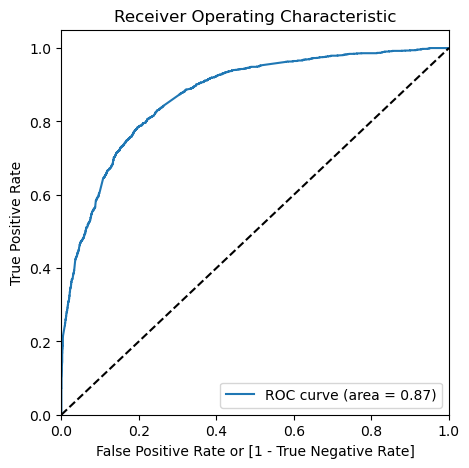

In [175]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(actual, probabilities, title='Receiver Operating Characteristic'):
    """
    Plots the Receiver Operating Characteristic (ROC) curve.
    
    Args:
    actual (array-like): The true binary labels.
    probabilities (array-like): The predicted probabilities of the positive class.
    title (str, optional): Title of the plot. Default is 'Receiver Operating Characteristic'.
    
    Returns:
    None
    """
    fpr, tpr, thresholds = roc_curve(actual, probabilities, drop_intermediate=False)
    auc_score = roc_auc_score(actual, probabilities)
    
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

actual_labels = abc_train_pred_final.Converted
predicted_probabilities = abc_train_pred_final.Conversion_Prob

# Calling the refactored ROC function
plot_roc_curve(actual_labels, predicted_probabilities)


The area under the ROC curve is 0.86, which is a relatively high value. This suggests that the model is performing well. We can further improve the model by examining the tradeoff between sensitivity and specificity.

In [176]:
# Create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    abc_train_pred_final[i]= abc_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
abc_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.345889,0,1,1,1,1,0,0,0,0,0,0
1,0,0.230048,0,1,1,1,0,0,0,0,0,0,0
2,1,0.944701,1,1,1,1,1,1,1,1,1,1,1
3,1,0.642076,1,1,1,1,1,1,1,1,0,0,0
4,1,0.994995,1,1,1,1,1,1,1,1,1,1,1


In [177]:
from sklearn.metrics import confusion_matrix

# Create a DataFrame to store accuracy, sensitivity, and specificity values
cutoff_df = pd.DataFrame(columns=['cutoff', 'accuracy', 'sensitivity', 'specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(abc_train_pred_final.Converted, abc_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     cutoff  accuracy  sensitivity  specificity
0.0     0.0  0.481352     1.000000     0.000000
0.1     0.1  0.580589     0.985954     0.204373
0.2     0.2  0.729335     0.942909     0.531119
0.3     0.3  0.768593     0.904395     0.642557
0.4     0.4  0.789967     0.810150     0.771236
0.5     0.5  0.790403     0.741731     0.835576
0.6     0.6  0.777972     0.677390     0.871320
0.7     0.7  0.743511     0.551880     0.921362
0.8     0.8  0.717993     0.466244     0.951640
0.9     0.9  0.657797     0.309017     0.981497


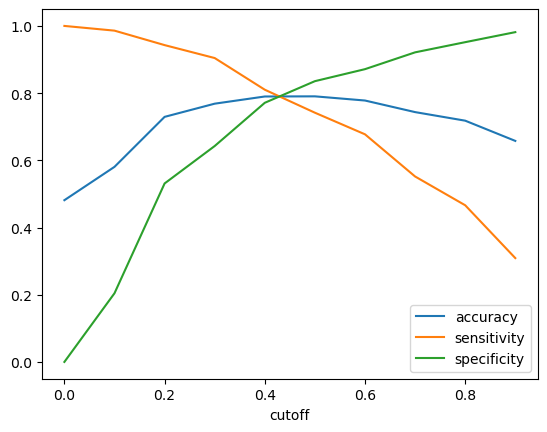

In [178]:
cutoff_df.plot.line(x='cutoff', y=['accuracy','sensitivity','specificity'])
plt.show()

In [179]:
# Around 0.42 lies the optimal value

In [180]:
abc_train_pred_final['final_predicted'] = abc_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

abc_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.345889,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.230048,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.944701,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.642076,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.994995,1,1,1,1,1,1,1,1,1,1,1,1


In [181]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(abc_train_pred_final.Converted, abc_train_pred_final.Predicted )
print(confusion)

[[1987  391]
 [ 570 1637]]


In [182]:
# Overall accuracy

print(metrics.accuracy_score(abc_train_pred_final.Converted, abc_train_pred_final.Predicted))

0.7904034896401309


In [183]:
# Other Metrics

TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [184]:
# 'sensitivity'

TP/(TP+FN)

0.7417308563661078

In [185]:
#  'specificity'

TN/(TN+FP)

0.8355761143818334

# Finally, making predictions on test set - 1

In [194]:
# Scaling the test set as well using just 'transform'
# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data
scaler.fit(xyz_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
xyz_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] =  scaler.transform(xyz_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [195]:
# Select the columns in X_train for X_test as well

xyz_test = xyz_test[col]
xyz_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Add Form,Olark Chat,Welingak Website,Yes,Yes,SMS Sent,SMS Sent,Housewife,Student,Unemployed,Working Professional,Had a Phone Conversation,Had a Phone Conversation,Modified,Unreachable,Unreachable
5966,3.0,255.0,3.0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0
152,2.0,234.0,1.0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0
5132,6.0,178.0,1.5,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
5308,12.0,142.0,4.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
5021,2.0,1260.0,2.0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0


In [198]:
xyz_test_sm = sm.add_constant(xyz_test[col])
xyz_test_sm

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Add Form,Olark Chat,Welingak Website,Yes,Yes,SMS Sent,SMS Sent,Housewife,Student,Unemployed,Working Professional,Had a Phone Conversation,Had a Phone Conversation,Modified,Unreachable,Unreachable
5966,1.0,3.0,255.0,3.0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0
152,1.0,2.0,234.0,1.0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0
5132,1.0,6.0,178.0,1.5,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
5308,1.0,12.0,142.0,4.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
5021,1.0,2.0,1260.0,2.0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2136,1.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4610,1.0,2.0,1683.0,2.0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0
5496,1.0,2.0,145.0,2.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
8257,1.0,3.0,127.0,3.0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0


In [200]:
abc_test_pred = fitted_model.predict(sm.add_constant(xyz_test))

In [201]:
abc_test_pred[:10]

5966    1.000000
152     1.000000
5132    1.000000
5308    1.000000
5021    1.000000
8191    0.842634
8389    1.000000
417     1.000000
6879    0.987722
3513    1.000000
dtype: float64

In [204]:
abc_pred_1 = pd.DataFrame(abc_test_pred)
abc_pred_1.head()

,0
5966,1.0
152,1.0
5132,1.0
5308,1.0
5021,1.0


In [208]:
abc_test_df = pd.DataFrame(abc_test)
abc_pred_1.reset_index(drop=True, inplace=True)
abc_test_df.reset_index(drop=True, inplace=True)
abc_pred_final = pd.concat([abc_test_df, abc_pred_1],axis=1)
abc_pred_final.head()

,Converted,0
0,0,1.0
1,0,1.0
2,0,1.0
3,0,1.0
4,1,1.0


In [209]:
abc_pred_final= abc_pred_final.rename(columns = {0 : 'Conversion_Prob'})
abc_pred_final.head()

,Converted,Conversion_Prob
0,0,1.0
1,0,1.0
2,0,1.0
3,0,1.0
4,1,1.0


In [210]:
abc_pred_final['final_predicted'] = abc_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
abc_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,1.0,1
1,0,1.0,1
2,0,1.0,1
3,0,1.0,1
4,1,1.0,1


In [211]:
# Let's check the overall accuracy

metrics.accuracy_score(abc_pred_final['Converted'], abc_pred_final.final_predicted)

0.5170483460559796

In [212]:
confusion2 = metrics.confusion_matrix(abc_pred_final['Converted'], abc_pred_final.final_predicted )
confusion2

array([[121, 860],
       [ 89, 895]])

In [214]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1] 
FN = confusion2[1,0] 

TP / float(TP+FN)

0.9095528455284553

In [215]:
TN / float(TN+FP)

0.12334352701325178

# Prevision - Recall View

In [216]:
confusion = metrics.confusion_matrix(abc_train_pred_final.Converted, abc_train_pred_final.Predicted )
confusion

array([[1987,  391],
       [ 570, 1637]])

In [217]:
# Precision

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8071992110453649

In [218]:
# Recall

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7417308563661078